# ETL Process

This is following the 'madewithml' mlops course data > labeling: https://madewithml.com/courses/mlops/labeling/

In [1]:
import pandas as pd

In [7]:
# ETL Process
# Extract data file 1 (projects)
projects_url = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/projects.csv"
projects = pd.read_csv(projects_url)
projects.head()

,id,created_on,title,description
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla..."
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...


In [8]:
# Extract data file 2 (tags)
tags_url = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/tags.csv"
tags = pd.read_csv(tags_url)
tags.head()

,id,tag
0,6,computer-vision
1,7,computer-vision
2,9,graph-learning
3,15,reinforcement-learning
4,19,graph-learning


In [9]:
# Transform
# Join projects and tags csv files
df = pd.merge(projects, tags, on='id')
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",graph-learning
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,reinforcement-learning
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...,graph-learning


In [10]:
# Remove projects with no tag
df = df[df.tag.notnull()]

In [21]:
# Load
# Save locally
df.to_csv('labeled_projects.csv', index=False)

In [22]:
!ls -1

03_pandas.ipynb
04_pandas.ipynb
DataScience1.ipynb
Untitled.ipynb
data.csv
labeled_projects.csv
myfirstnotebook.ipynb
processed_titanic.csv
titanic.csv


# EDA Process

This is following the 'madewithml' mlops course data > exploration: https://madewithml.com/courses/mlops/exploratory-data-analysis/

In [26]:
import sys
print(sys.executable)

/Users/davidescobar/anaconda3/bin/python


In [29]:
from collections import Counter
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
sns.set_theme()
warnings.filterwarnings('ignore')

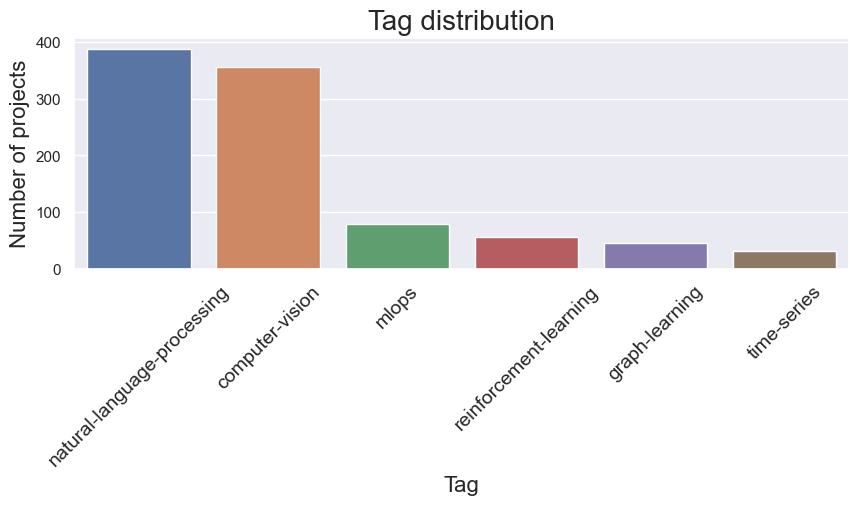

In [50]:
# Tag Distribution
# Q: How many data points do we have per tag?
# Code below will show a distribution of tags
tags, tag_counts = zip(*Counter(df.tag.values).most_common())
plt.figure(figsize=(10, 3))
ax = sns.barplot(x=list(tags), y=list(tag_counts))
plt.title('Tag distribution', fontsize=20)
plt.xlabel('Tag', fontsize=16)
ax.set_xticklabels(tags, rotation=45, fontsize=14)
plt.ylabel('Number of projects', fontsize=16)
plt.show()

In [51]:
# Q: What are the most common tags?
tags = Counter(df.tag.values)
tags.most_common()

[('natural-language-processing', 388),
 ('computer-vision', 356),
 ('mlops', 79),
 ('reinforcement-learning', 56),
 ('graph-learning', 45),
 ('time-series', 31)]

In [66]:
# Q: Does the title and description give enough signal unique to each tag?
# Code below shows most frequent tokens for each tag
@widgets.interact(tag=list(tags))
def display_word_cloud(tag='natural-language-processing'):
    # Plot word clouds to top tags
    plt.figure(figsize=(15,5))
    subset = df[df.tag==tag]
    text = subset.title.values
    cloud = WordCloud(
        stopwords=STOPWORDS, background_color='black', collocations=False,
        width=500, height=300).generate(' '.join(text))
    plt.axis('off')
    plt.imshow(cloud)

interactive(children=(Dropdown(description='tag', index=3, options=('computer-vision', 'graph-learning', 'rein…